# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

Максимальный балл за задание - 10.

## Часть 1. Обучение моделей классификации (5 баллов).

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

**A. (1 балл)** Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

**B. (1 балл)** Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

**C. (1 балл)** Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

**D. (1 балл)** Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

**E. (1 балл)** Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC?
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

### Сначала базовая предобработка данных

In [98]:
df = pd.read_csv("telecom_churn.csv") 

In [99]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [100]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [101]:
df.shape

(3333, 20)

In [102]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [103]:
np.unique(y.values)

array([False,  True])

In [104]:
y.value_counts() #Сильный дисбаланс классов, нельзя использовать экьюраси, буду использовать ф1 меру

False    2850
True      483
Name: Churn, dtype: int64

In [105]:
pd.isnull(df).sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [106]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

Пропусков нет, перекодируем категориальные переменные: State, area code, International plan, Voice mail plan 

In [107]:
np.unique(df['State'].values) # - кодируем one hot

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [108]:
np.unique(df['Area code'].values)# - кодируем one hot

array([408, 415, 510])

In [109]:
np.unique(df['International plan'].values) # - кодируем 1 0

array(['No', 'Yes'], dtype=object)

In [110]:
np.unique(df['Voice mail plan'].values) # - кодируем 1 0

array(['No', 'Yes'], dtype=object)

In [111]:
one_hot = pd.get_dummies(X['Area code'])
X = X.drop('Area code',axis = 1)
X = X.join(one_hot)

In [112]:
one_hot = pd.get_dummies(X['State'])
X = X.drop('State',axis = 1)
X = X.join(one_hot)

In [113]:
X.columns

Index([        'Account length',     'International plan',
              'Voice mail plan',  'Number vmail messages',
            'Total day minutes',        'Total day calls',
             'Total day charge',      'Total eve minutes',
              'Total eve calls',       'Total eve charge',
          'Total night minutes',      'Total night calls',
           'Total night charge',     'Total intl minutes',
             'Total intl calls',      'Total intl charge',
       'Customer service calls',                      408,
                            415,                      510,
                           'AK',                     'AL',
                           'AR',                     'AZ',
                           'CA',                     'CO',
                           'CT',                     'DC',
                           'DE',                     'FL',
                           'GA',                     'HI',
                           'IA',                     'ID

In [114]:
X.rename(columns = {408: '408', 415: '415', 510: '510'}, inplace = True)

In [115]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
X['International plan'] = ord_enc.fit_transform(X[['International plan']])
X['Voice mail plan'] = ord_enc.fit_transform(X[['Voice mail plan']])



In [116]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train, y_test = train_test_split(X, y, test_size=0.3) 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_1)
X_test = sc.transform(X_test_1)

In [117]:
X_train

array([[-0.95921138,  3.06086408,  1.64234767, ..., -0.14949521,
        -0.18350209, -0.15966999],
       [-1.53530293, -0.32670513,  1.64234767, ..., -0.14949521,
        -0.18350209, -0.15966999],
       [-1.63549277, -0.32670513,  1.64234767, ..., -0.14949521,
        -0.18350209, -0.15966999],
       ...,
       [ 1.34515482,  3.06086408,  1.64234767, ..., -0.14949521,
        -0.18350209, -0.15966999],
       [ 1.44534466, -0.32670513, -0.60888448, ..., -0.14949521,
         5.44952919, -0.15966999],
       [ 0.31820901, -0.32670513, -0.60888448, ..., -0.14949521,
        -0.18350209, -0.15966999]])

In [118]:
X_test

array([[ 1.21991753, -0.32670513,  1.64234767, ..., -0.14949521,
        -0.18350209, -0.15966999],
       [-2.06129957, -0.32670513, -0.60888448, ..., -0.14949521,
        -0.18350209, -0.15966999],
       [-0.40816729, -0.32670513, -0.60888448, ..., -0.14949521,
         5.44952919, -0.15966999],
       ...,
       [-0.33302491, -0.32670513, -0.60888448, ..., -0.14949521,
        -0.18350209, -0.15966999],
       [ 0.2681141 , -0.32670513,  1.64234767, ..., -0.14949521,
        -0.18350209, -0.15966999],
       [-0.55845204, -0.32670513, -0.60888448, ..., -0.14949521,
        -0.18350209, -0.15966999]])

**A. (1 балл)** Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

In [122]:

params = {'C': np.arange(0.1,1.1,0.1),
         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
grid = GridSearchCV(LogisticRegression(multi_class='auto'), 
                    params, 
                    scoring = 'f1')

grid.fit(X_train, y_train)

print('best score:', grid.best_score_)
print('best params:', grid.best_params_)

best score: 0.3385359536774022
best params: {'C': 0.8, 'solver': 'lbfgs'}


/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [123]:
model = LogisticRegression(solver='lbfgs', multi_class='auto', C = 0.8)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print('F1 train: ', f1_score(y_train, pred_train))
print('F1 test: ', f1_score(y_test, pred_test))
print()
print('roc_auc_score train: ', roc_auc_score(y_train, pred_train))
print('roc_auc_score test: ', roc_auc_score(y_test, pred_test))
print()
print('accuracy_score train: ', accuracy_score(y_train, pred_train))
print('accuracy_score test: ', accuracy_score(y_test, pred_test))


F1 train:  0.38211382113821135
F1 test:  0.35348837209302325

roc_auc_score train:  0.6233636158032785
roc_auc_score test:  0.6137971746794474

accuracy_score train:  0.8696956708101158
accuracy_score test:  0.861


F1 score довольно маленький, веоятно можно лучше. Но зато модель переобучилась: на трейне качество лучше, чем на тесте, но не слишком сильно. Accuracy не показетельный, потому что у нас дисбаланс классов и мы можем получить высокое качество даже на константной модели.

**B. (1 балл)** Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

In [67]:
params = {'C': [0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(LinearSVC(),
                    params,
                    scoring = 'f1')

grid.fit(X_train, y_train)

print('best score:', grid.best_score_)
print('best params:', grid.best_params_)

/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


best score: 0.2460005003261117
best params: {'C': 1}


/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [69]:
from sklearn import svm

SVM_model = svm.LinearSVC(C = 1)

SVM_model.fit(X_train, y_train)
pred_train_svm = SVM_model.predict(X_train)
pred_test_svm = SVM_model.predict(X_test)

print('F1 train: ', f1_score(y_train, pred_train_svm))
print('F1 test: ', f1_score(y_test, pred_test_svm))
print()
print('roc_auc_score train: ', roc_auc_score(y_train, pred_train_svm))
print('roc_auc_score test: ', roc_auc_score(y_test, pred_test_svm))
print()
print('accuracy_score train: ', accuracy_score(y_train, pred_train_svm))
print('accuracy_score test: ', accuracy_score(y_test, pred_test_svm))

F1 train:  0.28054298642533937
F1 test:  0.35294117647058826

roc_auc_score train:  0.5812760521715745
roc_auc_score test:  0.6098845324197437

accuracy_score train:  0.8636948135447922
accuracy_score test:  0.868


/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Качество модели ухудшилось, переобучения все еще нет.

**C. (1 балл)** Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

In [124]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


pd.DataFrame(X_train_poly)

,0,1,2,3,4,5,6,7,8,9,...,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627
0,1.0,-0.959211,3.060864,1.642348,2.085189,0.334493,0.478463,0.334436,1.795344,0.536934,...,0.019222,0.020727,0.025442,0.022137,0.022349,0.027433,0.02387,0.033673,0.029300,0.025495
1,1.0,-1.535303,-0.326705,1.642348,1.714649,0.798826,-1.566325,0.798875,-1.302870,-0.954159,...,0.019222,0.020727,0.025442,0.022137,0.022349,0.027433,0.02387,0.033673,0.029300,0.025495
2,1.0,-1.635493,-0.326705,1.642348,1.640541,-0.617660,1.376175,-0.617825,-0.749617,-1.003862,...,0.019222,0.020727,0.025442,0.022137,0.022349,0.027433,0.02387,0.033673,0.029300,0.025495
3,1.0,0.368304,-0.326705,1.642348,1.121785,1.310134,-1.117469,1.310077,-1.215930,1.033966,...,0.019222,0.020727,0.025442,0.022137,0.022349,0.027433,0.02387,0.033673,0.029300,0.025495
4,1.0,1.620677,-0.326705,-0.608884,-0.582699,0.726556,0.278972,0.726605,-0.447304,0.884856,...,0.019222,0.020727,0.025442,0.022137,0.022349,0.027433,0.02387,0.033673,0.029300,0.025495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,1.0,-0.508357,3.060864,-0.608884,-0.582699,0.847608,0.229099,0.847763,0.218575,0.984262,...,0.019222,0.020727,0.025442,0.022137,0.022349,0.027433,0.02387,0.033673,0.029300,0.025495
2329,1.0,-1.810825,-0.326705,-0.608884,-0.582699,2.397793,0.129353,2.397312,0.313418,2.525059,...,0.019222,0.020727,0.025442,0.022137,0.022349,0.027433,0.02387,0.033673,0.029300,0.025495
2330,1.0,1.345155,3.060864,1.642348,1.344109,0.563949,1.027065,0.563998,-1.210002,1.133372,...,0.019222,0.020727,0.025442,0.022137,0.022349,0.027433,0.02387,0.033673,0.029300,0.025495
2331,1.0,1.445345,-0.326705,-0.608884,-0.582699,-0.193076,0.677955,-0.192709,-0.054100,0.238716,...,0.019222,0.020727,-0.755549,0.022137,0.022349,-0.814678,0.02387,29.697368,-0.870126,0.025495


# LogReg

In [81]:
params = {'C': np.arange(0.1,1.1,0.1),
         'solver': ['lbfgs', 'liblinear']}
grid = GridSearchCV(LogisticRegression(multi_class='auto'), 
                    params, 
                    scoring = 'f1')

grid.fit(X_train_poly, y_train)

print('best score:', grid.best_score_)
print('best params:', grid.best_params_)

/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

best score: 0.46736531760922
best params: {'C': 0.5, 'solver': 'liblinear'}


In [84]:
model = LogisticRegression(solver='liblinear', multi_class='auto', C = 0.5)

model.fit(X_train_poly, y_train)

pred_train = model.predict(X_train_poly)
pred_test = model.predict(X_test_poly)
print('F1 train: ', f1_score(y_train, pred_train))
print('F1 test: ', f1_score(y_test, pred_test))
print()
print('roc_auc_score train: ', roc_auc_score(y_train, pred_train))
print('roc_auc_score test: ', roc_auc_score(y_test, pred_test))
print()
print('accuracy_score train: ', accuracy_score(y_train, pred_train))
print('accuracy_score test: ', accuracy_score(y_test, pred_test))

F1 train:  1.0
F1 test:  0.5017421602787456

roc_auc_score train:  1.0
roc_auc_score test:  0.7039239944169522

accuracy_score train:  1.0
accuracy_score test:  0.857


# SVM

In [125]:
params = {'C': [0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(LinearSVC(),
                    params,
                    scoring = 'f1')

grid.fit(X_train_poly, y_train)

print('best score:', grid.best_score_)
print('best params:', grid.best_params_)

/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-pack

best score: 0.5394195162567613
best params: {'C': 0.001}


In [126]:
from sklearn import svm

SVM_model = svm.LinearSVC(C = 0.001)

SVM_model.fit(X_train_poly, y_train)
pred_train_svm = SVM_model.predict(X_train_poly)
pred_test_svm = SVM_model.predict(X_test_poly)

print('F1 train: ', f1_score(y_train, pred_train_svm))
print('F1 test: ', f1_score(y_test, pred_test_svm))
print()
print('roc_auc_score train: ', roc_auc_score(y_train, pred_train_svm))
print('roc_auc_score test: ', roc_auc_score(y_test, pred_test_svm))
print()
print('accuracy_score train: ', accuracy_score(y_train, pred_train_svm))
print('accuracy_score test: ', accuracy_score(y_test, pred_test_svm))

F1 train:  0.9093799682034976
F1 test:  0.5217391304347825

roc_auc_score train:  0.917877524885376
roc_auc_score test:  0.7072672330517921

accuracy_score train:  0.9755679382768967
accuracy_score test:  0.879


Ну тут определееенно переобучение произошло, потому тчо 1 на трейне - это очень очень явный символ переобучения. Но при этом в общем качество модели на тесте выросло смотря на ф1 и рок аук, по сравнению с прошлыми моделями. При этом у SVM качество получилось чуть лучше, а переобучение - меньше.

**D. (1 балл)** Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

/var/folders/4n/kkp00v5n3zsd0hmt4dvr20nm0000gn/T/ipykernel_1396/1390095648.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

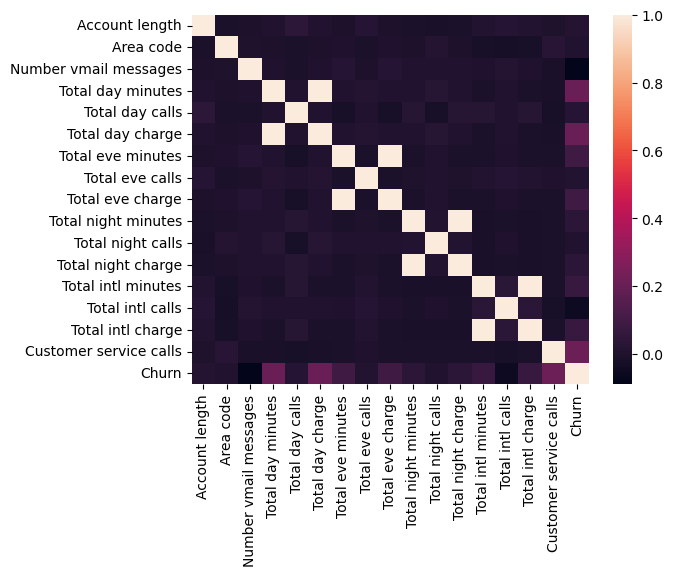

In [127]:
import seaborn as sns

plt.figure()
corr = df.corr()
sns.heatmap(corr)

In [128]:
corr

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


Получилась очень  милая корреляционная матрица как будто с цветочками. Жаль только эти цветочки говорят о том, что у нас есть проблема мультиколлинеарности, потому что, очевидно, переменные количество звонков и стоимость звонков в определенный промежуток дня коррелируют друг с другом. Удалим по одному из каждой пары. Также смотря на корреляцию между таргетом и объясняющими переменными, можем заметить, что таргет совсем не коррелирует с area code, total night calls, total eve calls (они все меньше 0.01)

In [129]:
X.columns

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', '408', '415', '510',
       'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object')

In [130]:
X = X.drop(['408',
            '415',
            '510',
            'Total night calls',
            'Total eve calls',
            'Total day minutes',
            'Total eve minutes',
            'Total night minutes',
            'Total intl minutes'], axis = 1)

# LogReg

In [131]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train, y_test = train_test_split(X, y, test_size=0.3) 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_1)
X_test = sc.transform(X_test_1)

In [132]:
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


pd.DataFrame(X_train_poly)

,0,1,2,3,4,5,6,7,8,9,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1.0,-0.977294,-0.323481,-0.626766,-0.599733,-0.019568,-0.371341,-0.573950,1.256315,-0.212584,...,0.018333,0.019414,0.024846,0.020842,0.02056,0.026312,0.022072,0.033673,0.028247,0.023695
1,1.0,-0.623868,-0.323481,-0.626766,-0.599733,2.085170,-1.639237,0.199567,-0.099142,-1.022971,...,0.018333,0.019414,0.024846,0.020842,0.02056,0.026312,0.022072,0.033673,0.028247,0.023695
2,1.0,-0.926804,-0.323481,-0.626766,-0.599733,2.335734,0.255617,-0.550860,1.366694,-1.022971,...,0.018333,0.019414,0.024846,0.020842,0.02056,0.026312,0.022072,0.033673,0.028247,0.023695
3,1.0,-0.320931,-0.323481,-0.626766,-0.599733,1.784493,2.218221,1.102389,-1.330974,-1.022971,...,0.018333,0.019414,0.024846,0.020842,0.02056,0.026312,0.022072,0.033673,0.028247,0.023695
4,1.0,0.007250,-0.323481,-0.626766,-0.599733,0.732124,0.067422,1.067754,1.494734,2.623774,...,0.018333,0.019414,0.024846,0.020842,0.02056,0.026312,0.022072,0.033673,0.028247,0.023695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,1.0,0.183963,-0.323481,-0.626766,-0.599733,1.082914,-0.760635,-0.571641,0.629361,-0.617777,...,0.018333,0.019414,0.024846,0.020842,0.02056,0.026312,0.022072,0.033673,0.028247,0.023695
2329,1.0,0.335431,-0.323481,1.595491,1.656887,-0.119794,0.779337,-0.412320,-0.964515,-0.212584,...,0.018333,0.019414,0.024846,0.020842,0.02056,0.026312,0.022072,0.033673,0.028247,0.023695
2330,1.0,-0.371421,-0.323481,-0.626766,-0.599733,-0.370358,0.687928,0.259602,0.571964,1.002998,...,0.018333,0.019414,0.024846,0.020842,0.02056,0.026312,0.022072,0.033673,0.028247,0.023695
2331,1.0,0.663612,-0.323481,-0.626766,-0.599733,-0.470584,-0.612230,0.040246,0.068635,-0.617777,...,54.547619,-1.059007,-1.355280,-1.136875,0.02056,0.026312,0.022072,0.033673,0.028247,0.023695


In [92]:
params = {'C': np.arange(0.1,1.1,0.1),
         'solver': ['lbfgs', 'liblinear']}
grid = GridSearchCV(LogisticRegression(multi_class='auto'), 
                    params, 
                    scoring = 'f1')

grid.fit(X_train_poly, y_train)

print('best score:', grid.best_score_)
print('best params:', grid.best_params_)

/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

best score: 0.4504218950468176
best params: {'C': 0.1, 'solver': 'liblinear'}


In [95]:
model = LogisticRegression(solver='liblinear', multi_class='auto', C = 0.5)

model.fit(X_train_poly, y_train)

pred_train = model.predict(X_train_poly)
pred_test = model.predict(X_test_poly)
print('F1 train: ', f1_score(y_train, pred_train))
print('F1 test: ', f1_score(y_test, pred_test))
print()
print('roc_auc_score train: ', roc_auc_score(y_train, pred_train))
print('roc_auc_score test: ', roc_auc_score(y_test, pred_test))
print()
print('accuracy_score train: ', accuracy_score(y_train, pred_train))
print('accuracy_score test: ', accuracy_score(y_test, pred_test))

F1 train:  0.9628482972136222
F1 test:  0.5036496350364963

roc_auc_score train:  0.9687895186384612
roc_auc_score test:  0.6957236842105263

accuracy_score train:  0.9897128161165881
accuracy_score test:  0.864


# SVM

In [133]:
params = {'C': [0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(LinearSVC(),
                    params,
                    scoring = 'f1')

grid.fit(X_train_poly, y_train)

print('best score:', grid.best_score_)
print('best params:', grid.best_params_)

/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/polinakrupica/anaconda3/lib/python3.10/site-pack

best score: 0.5386871750630421
best params: {'C': 0.01}


/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [134]:
from sklearn import svm

SVM_model = svm.LinearSVC(C = 0.01)

SVM_model.fit(X_train_poly, y_train)
pred_train_svm = SVM_model.predict(X_train_poly)
pred_test_svm = SVM_model.predict(X_test_poly)

print('F1 train: ', f1_score(y_train, pred_train_svm))
print('F1 test: ', f1_score(y_test, pred_test_svm))
print()
print('roc_auc_score train: ', roc_auc_score(y_train, pred_train_svm))
print('roc_auc_score test: ', roc_auc_score(y_test, pred_test_svm))
print()
print('accuracy_score train: ', accuracy_score(y_train, pred_train_svm))
print('accuracy_score test: ', accuracy_score(y_test, pred_test_svm))

F1 train:  0.9372128637059725
F1 test:  0.4386617100371747

roc_auc_score train:  0.9461127706257105
roc_auc_score test:  0.6690568779464824

accuracy_score train:  0.982426060865838
accuracy_score test:  0.849


/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


После анализа корреляций качество осталось примерно на том же уровне, но переобучение стало чуть чуть менее выраженным, хотя все еще очень сильным.

**E. (1 балл)** Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC?
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

В результате самый лучший результат дал SVMс полиномиальными признаками: 

F1 train:  0.9093799682034976
F1 test:  0.5217391304347825

roc_auc_score train:  0.917877524885376
roc_auc_score test:  0.7072672330517921

accuracy_score train:  0.9755679382768967
accuracy_score test:  0.879

Добавила только полиномиальные признаки, удаление коррелирующих признаков понизило качество. 

Не получилось добиться того, чтобы алгоритм не переобучался.

## Часть 2. Оценка качества моделей классификации (5 баллов).

**Задание 0. (0.25 балла)** Закончите определения, начинающиеся так:

    * accuracy - это доля правильных ответов среди всех объектов.
    
    * точность (precision) - это доля правильных положительных ответов среди всех положительных ответов.
    
    * полнота (recall) - это доля правильно положительных ответов среди всех положительных объектов.
    
    * TPR - это доля правильных ответов положительного класса среди всех положительных объектов.
    
    
Продолжите определения прямо в этой ячейке.

_______________________________________________________________________________________________

В этой части вы будете работать с данными в задаче скоринга. За работу с этими данными можно получить **5 баллов.**

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные).
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [136]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [ ]:
df.shape

**Задание 1. (0.25 балла)** Проверьте target на сбалансированность по классам, сделайте вывод.

In [138]:
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))

0    382
1    307
Name: target, dtype: int64
0    0.554427
1    0.445573
Name: target, dtype: float64


Классы достаточно сбалансированны, есть небольшой перевес в пользу 0 класса.

**Задание 2. (0.25 балла)** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [141]:
for i in ['pred1_classes', 'pred2_classes', 'pred3_classes']:
    print('accuracy_score for', i, accuracy_score(df['target'], df[i]))

accuracy_score for pred1_classes 0.6618287373004355
accuracy_score for pred2_classes 0.6719883889695211
accuracy_score for pred3_classes 0.6400580551523948


Наибольшая accuracy у алгоритма 2

**Задание 3. (0.25 балла)** Теперь вычислите точность и полноту каждого из алгоритмов.

In [143]:
for i in ['pred1_classes', 'pred2_classes', 'pred3_classes']:
    print('precision_score for', i, precision_score(df['target'], df[i]))
    
print() 

for i in ['pred1_classes', 'pred2_classes', 'pred3_classes']:
    print('recall_score for', i, recall_score(df['target'], df[i]))

precision_score for pred1_classes 0.6907216494845361
precision_score for pred2_classes 0.6103542234332425
precision_score for pred3_classes 0.6903225806451613

recall_score for pred1_classes 0.4364820846905538
recall_score for pred2_classes 0.7296416938110749
recall_score for pred3_classes 0.3485342019543974


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4. (0.5 балла)** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [144]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

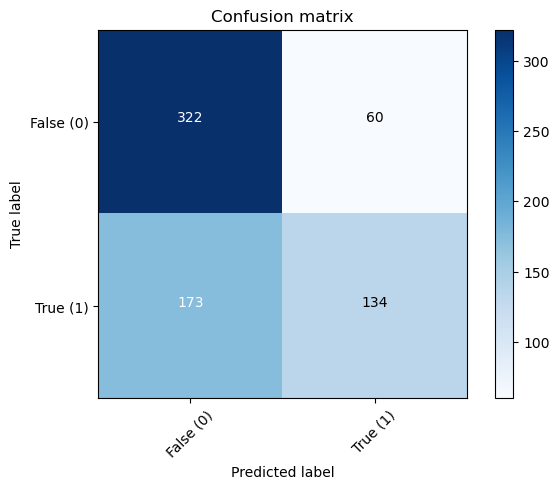

In [147]:
conf_mat = plot_confusion_matrix(cm = confusion_matrix(df['target'], 
                                                       df['pred1_classes']), 
                                 classes = ['False (0)', 'True (1)'])
    

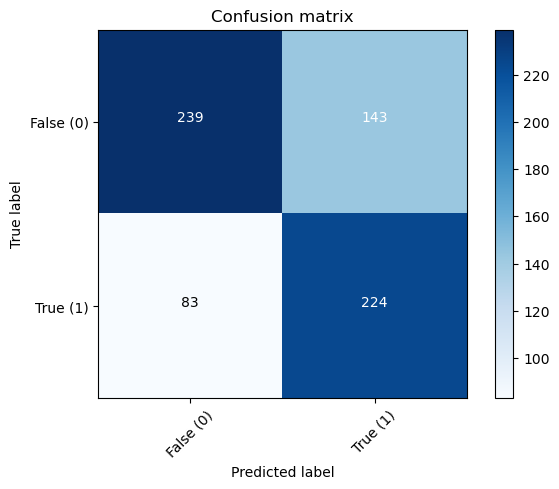

In [148]:
conf_mat = plot_confusion_matrix(cm = confusion_matrix(df['target'], 
                                                       df['pred2_classes']), 
                                 classes = ['False (0)', 'True (1)'])

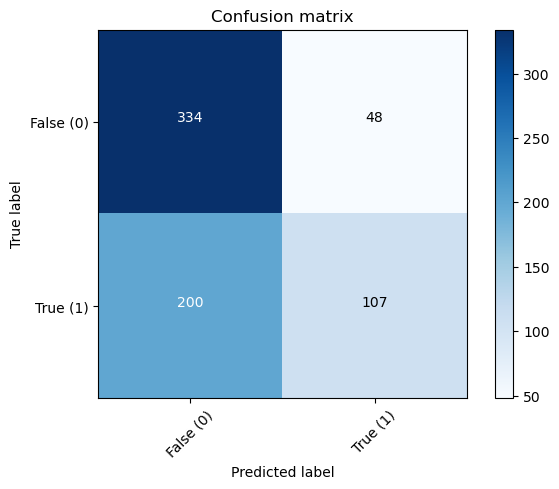

In [149]:
conf_mat = plot_confusion_matrix(cm = confusion_matrix(df['target'], 
                                                       df['pred3_classes']), 
                                 classes = ['False (0)', 'True (1)'])

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5. (0.5 балла)** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

# pred1_probs

In [165]:
thresholds = []
recalls = []
accuracies = []
for threshold in np.arange(0.1, 1, 0.01):
    y_pred = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred)
    rec = recall_score(df['target'], y_pred)
    if acc >= 0.65:
        thresholds.append(threshold)
        recalls.append(rec)
        accuracies.append(acc)


In [172]:
pd.DataFrame(data = [recalls, accuracies], columns = thresholds, index = ['recall', 'acuuracy'])

,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55
recall,0.742671,0.729642,0.703583,0.680782,0.657980,0.635179,0.605863,0.570033,0.547231,0.524430,0.501629,0.472313,0.459283,0.446254,0.436482,0.426710,0.407166,0.390879,0.374593,0.348534
acuuracy,0.651669,0.654572,0.651669,0.658926,0.667634,0.664731,0.667634,0.663280,0.666183,0.664731,0.663280,0.661829,0.661829,0.664731,0.661829,0.669086,0.661829,0.663280,0.661829,0.653120


In [180]:
print('макс полнота:', max(recalls))

макс полнота: 0.742671009771987


# pred2_probs

In [181]:
thresholds = []
recalls = []
accuracies = []
for threshold in np.arange(0.1, 1, 0.01):
    y_pred = np.where(df.pred2_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred)
    rec = recall_score(df['target'], y_pred)
    if acc >= 0.65:
        thresholds.append(threshold)
        recalls.append(rec)
        accuracies.append(acc)

In [182]:
pd.DataFrame(data = [recalls, accuracies], columns = thresholds, index = ['recall', 'acuuracy'])

,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,...,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75
recall,0.837134,0.837134,0.837134,0.837134,0.837134,0.820847,0.814332,0.814332,0.814332,0.814332,...,0.319218,0.319218,0.319218,0.319218,0.296417,0.296417,0.296417,0.267101,0.267101,0.267101
acuuracy,0.674891,0.674891,0.674891,0.674891,0.674891,0.685051,0.682148,0.682148,0.682148,0.682148,...,0.663280,0.663280,0.663280,0.663280,0.656023,0.656023,0.656023,0.650218,0.650218,0.650218


In [183]:
print('макс полнота:', max(recalls))

макс полнота: 0.8371335504885994


# pred3_probs

In [186]:
thresholds = []
recalls = []
accuracies = []
for threshold in np.arange(0.1, 1, 0.01):
    y_pred = np.where(df.pred3_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred)
    rec = recall_score(df['target'], y_pred)
    if acc >= 0.65:
        thresholds.append(threshold)
        recalls.append(rec)
        accuracies.append(acc)

In [187]:
pd.DataFrame(data = [recalls, accuracies], columns = thresholds, index = ['recall', 'acuuracy'])

""
recall
acuuracy


In [188]:
print('макс полнота:', max(recalls))

ValueError: max() arg is an empty sequence

На третьем классификаторе не получилось найти такой порог, при котором acc не менее 0,65

**Задание 6. (0.5 балла)** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

In [190]:
y_pred_1 = np.where(df.pred1_probs >= 0.36, 1, 0)
y_pred_2 = np.where(df.pred2_probs >= 0.27, 1, 0)

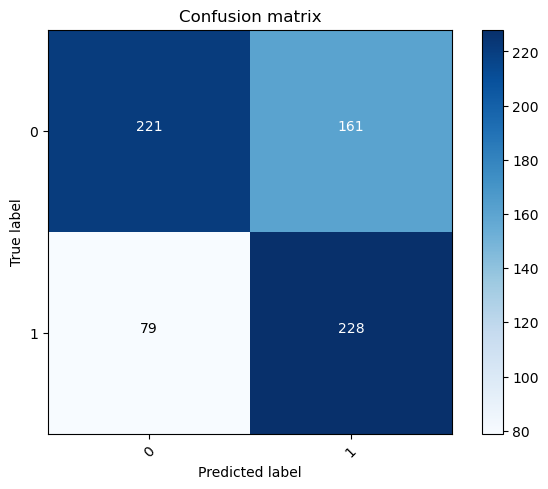

In [193]:
conf_mat = plot_confusion_matrix(cm = confusion_matrix(df['target'], y_pred_1),
                             classes = ['0', '1'])

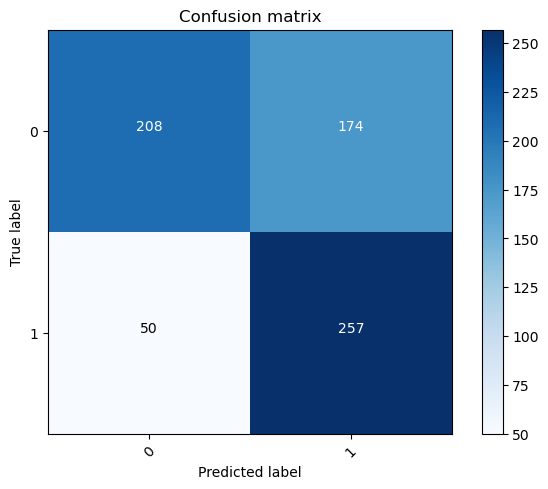

In [194]:
conf_mat = plot_confusion_matrix(cm = confusion_matrix(df['target'], y_pred_2),
                             classes = ['0', '1'])

**Выводы:** здесь напишите, какая модель лучше всего справилась с поставленной задачей.

Поскольку нашей целью было получиьт как можно большую полноту, то вторая модель справилась с этим лучше:

макс полнота 1 модели: 0.742671009771987

макс полнота 2 модели: 0.8371335504885994

+ число в левом нижнем квадрате материцы ошибок меньше у второй модели

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги).
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7. (0.5 балла)** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

# pred1_probs

In [208]:
thresholds = []
precisions = []
accuracies = []
for threshold in np.arange(0.1, 1, 0.01):
    y_pred_2 = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_2)
    pre = precision_score(df['target'], y_pred_2)
    if acc >= 0.65:
        thresholds.append(threshold)
        precisions.append(pre)
        accuracies.append(acc)

In [209]:
pd.DataFrame(data = [precisions, accuracies], columns = thresholds, index = ['precision', 'accuracy'])

,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55
precision,0.586118,0.591029,0.591781,0.604046,0.619632,0.621019,0.632653,0.636364,0.648649,0.654472,0.660944,0.671296,0.677885,0.691919,0.690722,0.715847,0.710227,0.727273,0.737179,0.732877
accuracy,0.651669,0.654572,0.651669,0.658926,0.667634,0.664731,0.667634,0.663280,0.666183,0.664731,0.663280,0.661829,0.661829,0.664731,0.661829,0.669086,0.661829,0.663280,0.661829,0.653120


In [210]:
print('макс точность:', max(precisions))

макс точность: 0.7371794871794872


# pred2_probs

In [218]:
thresholds = []
precisions = []
accuracies = []
for threshold in np.arange(0.1, 1, 0.01):
    y_pred_2 = np.where(df.pred2_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_2)
    pre = precision_score(df['target'], y_pred_2)
    if acc >= 0.65:
        thresholds.append(threshold)
        precisions.append(pre)
        accuracies.append(acc)

/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/polinakrupica/anaconda3/lib/python3.10/site-packages/sklearn

In [219]:
pd.DataFrame(data = [precisions, accuracies], columns = thresholds, index = ['precision', 'accuracy'])

,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,...,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75
precision,0.596288,0.596288,0.596288,0.596288,0.596288,0.608696,0.606796,0.606796,0.606796,0.606796,...,0.809917,0.809917,0.809917,0.809917,0.812500,0.812500,0.812500,0.836735,0.836735,0.836735
accuracy,0.674891,0.674891,0.674891,0.674891,0.674891,0.685051,0.682148,0.682148,0.682148,0.682148,...,0.663280,0.663280,0.663280,0.663280,0.656023,0.656023,0.656023,0.650218,0.650218,0.650218


In [220]:
print('макс точность:', max(precisions))

макс точность: 0.8367346938775511


# pred3_probs

In [221]:
thresholds = []
precisions = []
accuracies = []
for threshold in np.arange(0.1, 1, 0.01):
    y_pred_2 = np.where(df.pred3_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_2)
    pre = precision_score(df['target'], y_pred_2)
    if acc >= 0.65:
        thresholds.append(threshold)
        precisions.append(pre)
        accuracies.append(acc)

In [222]:
pd.DataFrame(data = [precisions, accuracies], columns = thresholds, index = ['precision', 'accuracy'])

""
precision
accuracy


In [223]:
print('макс точность:', max(precisions))

ValueError: max() arg is an empty sequence

Очевидно что в третьей модели все еще нет такого порога, что аккьюраси больше 0,65

**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

In [225]:
y_pred_1 = np.where(df.pred1_probs >= 0.54, 1, 0)
y_pred_2 = np.where(df.pred2_probs >= 0.75, 1, 0)

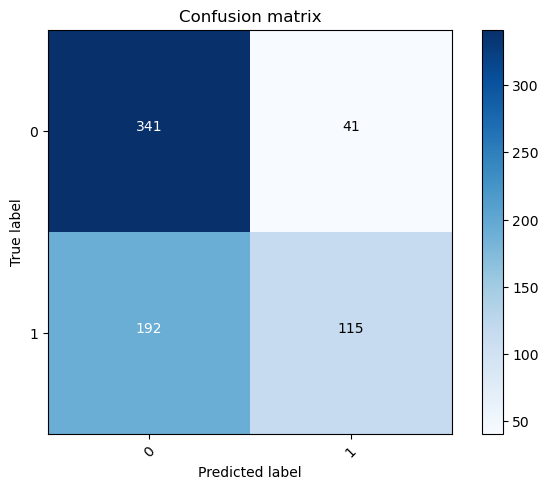

In [226]:
conf_mat = plot_confusion_matrix(cm = confusion_matrix(df['target'], y_pred_1),
                             classes = ['0', '1'])

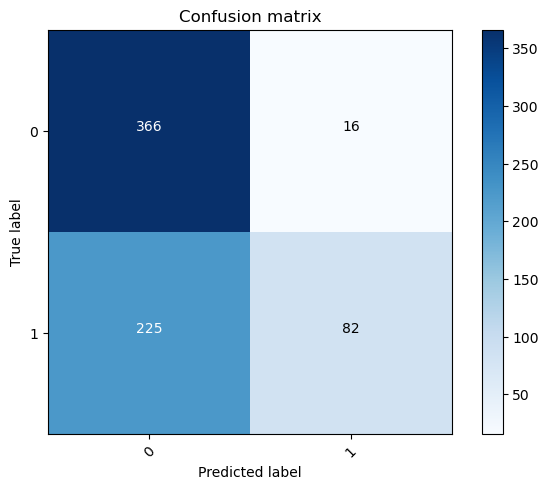

In [227]:
conf_mat = plot_confusion_matrix(cm = confusion_matrix(df['target'], y_pred_2),
                             classes = ['0', '1'])

Вторая модель снова справилась лучше - число в правом верхнем квадрате минимально, значение precision больше, чем в первой модели.

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9. (0.5 балла)** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

# pred1_probs


In [230]:
thresholds = []
f1s = []
accuracies = []
for threshold in np.arange(0.1, 1, 0.01):
    y_pred_2 = np.where(df.pred1_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_2)
    f1 = f1_score(df['target'], y_pred_2)
    if acc >= 0.65:
        thresholds.append(threshold)
        f1s.append(f1)
        accuracies.append(acc)

In [234]:
pd.DataFrame(data = [f1s, accuracies], columns = thresholds, index = ['f1', 'accuracy'])

,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55
f1,0.655172,0.653061,0.642857,0.640123,0.638231,0.628019,0.618968,0.601375,0.593640,0.582278,0.57037,0.554493,0.547573,0.542574,0.534930,0.534694,0.517598,0.508475,0.496760,0.472406
accuracy,0.651669,0.654572,0.651669,0.658926,0.667634,0.664731,0.667634,0.663280,0.666183,0.664731,0.66328,0.661829,0.661829,0.664731,0.661829,0.669086,0.661829,0.663280,0.661829,0.653120


In [235]:
print('макс f1:', max(f1s))

макс f1: 0.6551724137931035


# pred2_probs



In [236]:
thresholds = []
f1s = []
accuracies = []
for threshold in np.arange(0.1, 1, 0.01):
    y_pred_2 = np.where(df.pred2_probs >= threshold, 1, 0)
    acc = accuracy_score(df['target'], y_pred_2)
    f1 = f1_score(df['target'], y_pred_2)
    if acc >= 0.65:
        thresholds.append(threshold)
        f1s.append(f1)
        accuracies.append(acc)

In [237]:
pd.DataFrame(data = [f1s, accuracies], columns = thresholds, index = ['f1', 'accuracy'])

,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,...,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75
f1,0.696477,0.696477,0.696477,0.696477,0.696477,0.699029,0.695410,0.695410,0.695410,0.695410,...,0.457944,0.457944,0.457944,0.457944,0.434368,0.434368,0.434368,0.404938,0.404938,0.404938
accuracy,0.674891,0.674891,0.674891,0.674891,0.674891,0.685051,0.682148,0.682148,0.682148,0.682148,...,0.663280,0.663280,0.663280,0.663280,0.656023,0.656023,0.656023,0.650218,0.650218,0.650218


In [238]:
print('макс f1:', max(f1s))

макс f1: 0.6990291262135923


Не удивительно, что вторая модель решает задачу лучше, потому что она решала задачу по отдельности для точности и полноты лучше, а f1 это просто комбинация точности и полноты.

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [239]:
from sklearn.metrics import classification_report

print(classification_report(df['target'], df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10. (0.5 балла)** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [243]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.460,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.170,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,31.57,10.500,2,14,4,6.500,1,0,0,...,2,0,1,1,0.776376,1,0.804659,1,0.910302,1
685,1,20.67,0.415,2,8,4,0.125,0,0,0,...,2,0,45,0,0.273138,0,0.175782,0,0.139252,0
686,0,18.83,9.540,2,6,4,0.085,1,0,0,...,2,100,1,1,0.383878,0,0.185941,0,0.272625,0
687,0,27.42,14.500,2,14,8,3.085,1,1,1,...,2,120,12,1,0.645865,1,0.804659,1,0.682064,1


In [244]:
X = df.drop('target', axis=1)
y = df['target']

In [245]:
X_train_1, X_test_1, y_train, y_test = train_test_split(X, y, test_size=0.3) 

sc = StandardScaler()
X_train = sc.fit_transform(X_train_1)
X_test = sc.transform(X_test_1)

In [246]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.8672199170124482, 0.8792270531400966)

**Задание 11. (0.5 балла)** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность
    б) полноту
    в) f1-score.
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

In [248]:
pred_probas = model.predict_proba(X_train)
pred_probas 


array([[6.50356538e-01, 3.49643462e-01],
       [1.39865153e-02, 9.86013485e-01],
       [1.76234855e-01, 8.23765145e-01],
       [6.31814894e-01, 3.68185106e-01],
       [5.36982624e-02, 9.46301738e-01],
       [2.96405953e-02, 9.70359405e-01],
       [1.36893411e-01, 8.63106589e-01],
       [9.63794310e-01, 3.62056898e-02],
       [9.46814820e-01, 5.31851799e-02],
       [4.18859711e-01, 5.81140289e-01],
       [4.03763289e-01, 5.96236711e-01],
       [9.65498323e-01, 3.45016773e-02],
       [8.58417322e-01, 1.41582678e-01],
       [5.35231674e-01, 4.64768326e-01],
       [1.16923115e-02, 9.88307688e-01],
       [1.28436487e-01, 8.71563513e-01],
       [9.61665926e-01, 3.83340740e-02],
       [1.36239183e-01, 8.63760817e-01],
       [7.62255171e-01, 2.37744829e-01],
       [1.55890818e-02, 9.84410918e-01],
       [8.92269546e-01, 1.07730454e-01],
       [2.12373939e-01, 7.87626061e-01],
       [1.84070181e-02, 9.81592982e-01],
       [9.56855411e-01, 4.31445886e-02],
       [6.852996

In [249]:
pred_probas = pred_probas.T[1]

In [253]:
pred_probas.shape

(482,)

In [254]:
thresholds = []
f1s = []
recalls = []
precisions = []
accuracies = []
for threshold in np.arange(0.1, 1, 0.01):
    y_pred = np.where(pred_probas >= threshold, 1, 0)
    acc = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    rec = recall_score(y_train, y_pred)
    pre = precision_score(y_train, y_pred)
    if acc >= 0.86:
        thresholds.append(threshold)
        f1s.append(f1)
        accuracies.append(acc)
        precisions.append(pre)
        recalls.append(rec)

In [259]:
pd.DataFrame(data = [accuracies, recalls, precisions, f1s], columns = thresholds, index = [ 'accuracy', 'recall', 'precision', 'f1'])

,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,...,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67
accuracy,0.860996,0.867220,0.867220,0.867220,0.865145,0.867220,0.871369,0.871369,0.873444,0.873444,...,0.877593,0.871369,0.869295,0.869295,0.869295,0.871369,0.875519,0.871369,0.869295,0.860996
recall,0.933036,0.933036,0.928571,0.928571,0.924107,0.924107,0.924107,0.924107,0.924107,0.924107,...,0.866071,0.852679,0.843750,0.843750,0.834821,0.825893,0.821429,0.812500,0.808036,0.790179
precision,0.800766,0.810078,0.812500,0.812500,0.811765,0.814961,0.821429,0.821429,0.824701,0.824701,...,0.869955,0.868182,0.870968,0.870968,0.877934,0.889423,0.901961,0.900990,0.900498,0.898477
f1,0.861856,0.867220,0.866667,0.866667,0.864301,0.866109,0.869748,0.869748,0.871579,0.871579,...,0.868009,0.860360,0.857143,0.857143,0.855835,0.856481,0.859813,0.854460,0.851765,0.840855


In [265]:
print('max f1:', round(max(f1s), 2), 'threshold:', round(thresholds[f1s.index(max(f1s))], 2))
print('max recall:', round(max(recalls), 2), 'threshold:', round(thresholds[recalls.index(max(recalls))], 2))
print('max precision:', round(max(precisions), 2), 'threshold:', round(thresholds[precisions.index(max(precisions))], 2))


max f1: 0.87 threshold: 0.4
max recall: 0.93 threshold: 0.24
max precision: 0.9 threshold: 0.64


Да, логистическая регрессия справилась с задачей гораздо лучше.